In [274]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np # numpy library
import scipy.linalg as lng # linear algebra from scipy library
from sklearn import preprocessing as preproc # load preprocessing function
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lars
from sklearn.linear_model import LassoLars
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.utils import resample
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer
import random
from sklearn.utils import resample
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
import math

In [275]:
# seaborn can be used to "prettify" default matplotlib plots by importing and setting as default
import seaborn as sns
sns.set() # Set searborn as default
# Load the data using pandas
# Correct path to the uploaded file
case1DataPath = 'case1Data.txt'

# Reading the dataset
df = pd.read_csv(case1DataPath, delimiter=',')

In [292]:

def initial_pre(df):
# We can see from the data that the first column is the tagret variable (float) and the other 100 columns are the features. 
#Last five columns are characters.
    df.replace('NaN', np.nan, inplace=True)
# check the data types of the columns
    df.dtypes
# change the data types of columns 1-96 to float
    df.iloc[:, 0:96] = df.iloc[:, 0:96].astype(float)
    df.dtypes
# check for the last 4 columns the number of unique values they contain and the unique values
    df.iloc[:, 96:101].nunique()
    df.iloc[:, 96:101].apply(lambda x: x.unique())
# since column ' C_ 2' has only one unique value, we can drop it
    df = df.drop([' C_ 2'], axis=1)
    df.replace(' NaN', np.nan, inplace=True)
# Check for missing values
    print(df.isnull().sum())
# Total count of missing values in the DataFrame
    total_missing_values = df.isnull().sum().sum()
    print(total_missing_values)
# Statistical summary of numerical features
    print(df.describe())

    return df



In [296]:
def initial_pre1(df):
# We can see from the data that the first column is the tagret variable (float) and the other 100 columns are the features. 
#Last five columns are characters.
    df.replace('NaN', np.nan, inplace=True)
# check the data types of the columns
    df.dtypes
# change the data types of columns 1-96 to float
    df.iloc[:, 0:95] = df.iloc[:, 0:95].astype(float)
    df.dtypes
# check for the last 4 columns the number of unique values they contain and the unique values
    df.iloc[:, 95:100].nunique()
    df.iloc[:, 95:100].apply(lambda x: x.unique())
# since column ' C_ 2' has only one unique value, we can drop it
    df = df.drop([' C_ 2'], axis=1)
    df.replace(' NaN', np.nan, inplace=True)
# Check for missing values
    print(df.isnull().sum())
# Total count of missing values in the DataFrame
    total_missing_values = df.isnull().sum().sum()
    print(total_missing_values)
# Statistical summary of numerical features
    print(df.describe())

    return df

In [ ]:
df = initial_pre(df)

In [277]:
def impute_missing_values(df):
    
    # convert df numpy to pandas
    df = pd.DataFrame(df)

    # Copy the DataFrame to avoid changing the original data
    df_imputed = df.copy()
    
    # Iterate over columns in DataFrame (column X_1 to column X_95)
    for column in df_imputed.columns:
        # Randomly decide if column is MCAR or MAR (for example purposes)
        if random.choice([True, False]):  # Replace with actual logic for MCAR vs MAR
            # MCAR: Randomly sample from the column's non-missing values
            if df_imputed[column].isnull().sum() > 0:  # Check if there are any missing values
                non_missing_values = df_imputed[column].dropna().values
                df_imputed[column] = df_imputed[column].apply(
                    lambda x: np.random.choice(non_missing_values) if pd.isnull(x) else x
                )
        else:
            # MAR: Use multiple imputation
            imputer = IterativeImputer(max_iter=10, random_state=0)
            df_imputed[column] = imputer.fit_transform(df_imputed[[column]])

    return df_imputed


In [278]:
def handle_categorical_values(df):
    categories = df.keys()[-4:].to_list()

    # Reshape the data to a 2D array
    data = np.array(categories).reshape(-1, 1)

    # Initialize the OneHotEncoder
    encoder = OneHotEncoder()

    # Fit and transform the data
    one_hot_encoded = pd.get_dummies(df[categories])
    one_hot_encoded = one_hot_encoded.astype(int)


    df = df.drop(categories,axis=1)
    df = pd.concat([df,one_hot_encoded],axis= 1)

    return df

In [279]:
df = handle_categorical_values(df)
df = impute_missing_values(df)

# print number of missing values
print(df.isnull().sum().sum())

# print type of df
print(type(df))

df.head(25)

0
<class 'pandas.core.frame.DataFrame'>


,y,x_ 1,x_ 2,x_ 3,x_ 4,x_ 5,x_ 6,x_ 7,x_ 8,x_ 9,...,C_ 4_ G,C_ 4_ H,C_ 4_ I,C_ 4_ J,C_ 4_ K,C_ 5_ G,C_ 5_ H,C_ 5_ I,C_ 5_ J,C_ 5_ K
0,90.685036,31.991717,9.669631,-3.978178,-1.504027,-14.986790,0.651581,-37.878245,16.213807,-3.965437,...,0.0,0,0.0,0.0,1,0,0.0,0,1,0
1,60.844445,26.204958,11.185962,-8.247602,-3.875866,-11.329702,2.637900,-39.617497,15.323868,-2.442164,...,1.0,0,0.0,0.0,0,1,0.0,0,0,0
2,18.062345,18.560873,11.355342,-9.370161,-3.745315,-16.292421,-1.831774,-37.584605,14.411348,-2.376175,...,0.0,1,0.0,0.0,0,1,0.0,0,0,0
3,-8.139839,31.896496,10.069040,-9.484426,-1.512786,-11.421909,-5.649180,-42.830037,18.403197,-7.791762,...,0.0,0,0.0,0.0,1,1,0.0,0,0,0
4,-4.994792,25.400286,14.410919,-3.600959,-2.615988,-15.455676,-4.950816,-39.932456,15.323868,-7.341165,...,0.0,0,0.0,0.0,1,0,1.0,0,0,0
5,-71.946849,20.182342,11.442101,-15.848929,-5.433512,-18.470896,-3.772478,-39.311873,10.820767,-8.019431,...,0.0,0,0.0,1.0,0,0,0.0,0,0,1
6,-43.252217,21.581276,9.983328,-9.744737,-0.190867,-16.392856,-3.746710,-36.937439,12.199710,-6.301302,...,0.0,0,0.0,0.0,1,0,1.0,0,0,0
7,46.659819,23.541431,11.830937,-9.744737,-3.960168,-16.392856,-4.617966,-41.043839,17.473770,-4.969147,...,0.0,0,0.0,1.0,0,0,0.0,0,1,0
8,-46.682309,21.826025,9.841068,-10.822232,-9.082918,-17.277498,-7.583377,-37.240807,15.739363,-9.962687,...,0.0,0,1.0,0.0,0,0,0.0,0,0,1
9,59.962466,27.634692,15.437111,-9.744737,-4.582242,-16.392856,-2.733406,-39.461801,17.791352,-6.403260,...,0.0,1,0.0,0.0,0,0,0.0,1,0,0


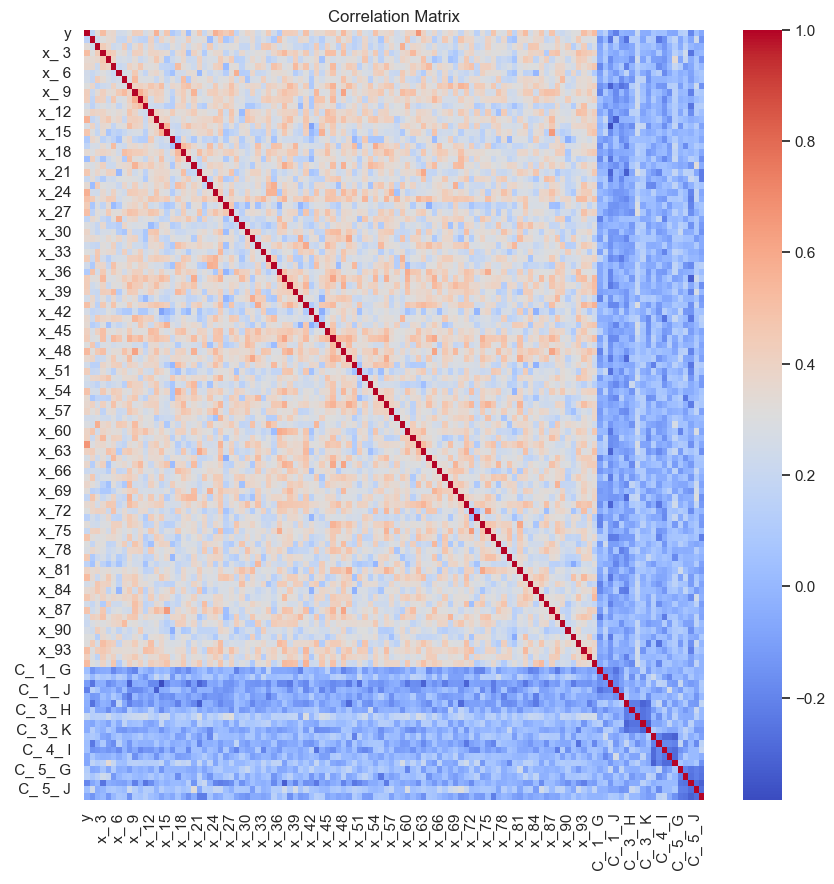

In [280]:
# correlation matrix 
correlation_matrix = df.corr()
# plot the correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

> ## Cross-Validation

In [281]:
# split df to df1 that has 85 random rows and df2 that has the rest of the rows
df1 = df




# target and features pandas
y = df1.iloc[:, 0]
X = df1.iloc[:, 1:]

# number of observations and number of features pandas
N, p = X.shape 
print(p)
print(N)

115
100


In [282]:
k = 5 # number of folds
kf = KFold(n_splits=k, random_state=42, shuffle=True)
kf.get_n_splits(X)

stop = int(np.ceil(N/k))
n =150
lambdas_ridge = np.logspace(-3, 3, n)
lambdas_lasso = np.logspace(-3, 3, n)
lambdas_elastic = np.logspace(-3, 0, n)
lambdas1_elastic = np.logspace(-3, 3, n)
lambdas_lars = range(1, stop)




c:\Users\mario\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:250: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
c:\Users\mario\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:250: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
c:\Users\mario\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:248: LinAlgWarning: Ill-conditioned matrix (rcond=5.56429e-18): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
c:\Users\mario\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:250: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
c:\Users\mario\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:248: LinAlgWarning: Ill-conditioned matrix (rcond=4.78522e-18): result may not be accurate.
  dual_coef = linalg.solve(K, y, ass

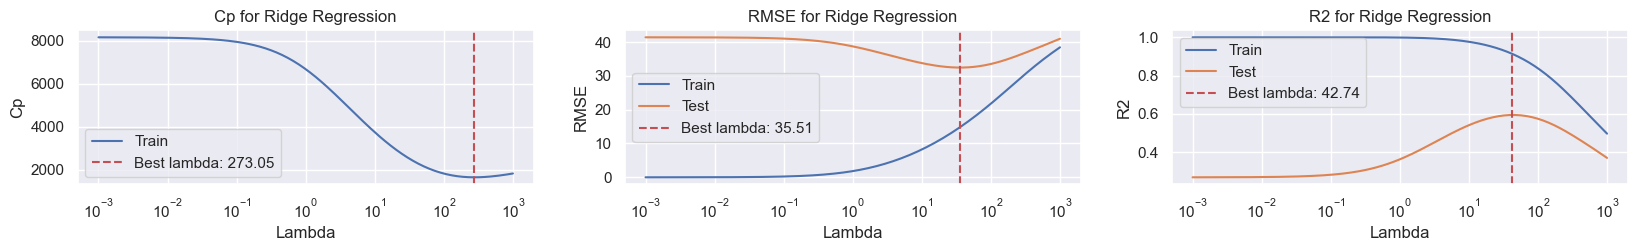

Best lambda for RMSE Ridge Regression: 35.5087652232611
Best RMSE for Ridge Regression: 32.44327853984302
R2 score with best lambda RMSE Ridge Regression: 0.5933461525168574
Best lambda for Cp Ridge Regression: 273.049641545532


In [283]:
# cross validation 




# metrics
train_r2 = np.zeros((n, k))
test_r2 = np.zeros((n, k))
train_rmse = np.zeros((n, k))
test_rmse = np.zeros((n, k))
mean_r2 = np.zeros((n, k))
mean_rmse = np.zeros((n, k))
cp = np.zeros((n, k))




# Iterate through each KFold
fold_idx = 0
for i,(train_index, test_index) in enumerate(kf.split(X)):
    # Split train-test


    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # MISSING VALUE HANDLING WITHIN THE LOOP 
    X_train = handle_categorical_values(X_train)
    X_train = impute_missing_values(X_train)  # Imputation on training data

    # MISSING VALUE HANDLING WITHIN THE LOOP (for test set)
    X_test = handle_categorical_values(X_test)
    X_test = impute_missing_values(X_test)
    
    
    # align train and test data
    X_train, X_test = X_train.align(X_test, join = 'inner', axis=1)

    X_train = X_train.to_numpy()
    X_test = X_test.to_numpy()

    # Standardize the data x_train
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # OLS Regression

    # Fit the model
    model_ols = Ridge(alpha=0)
    model_ols.fit(X_train, y_train)

    #Calculate the MSE for OLS
    y_pred = model_ols.predict(X_test)
    mse_OLS = mean_squared_error(y_test, y_pred)
    
    # Ridge Regression

    for lambda_index, lambda_ in enumerate(lambdas_ridge):
        model_ridge = Ridge(alpha=lambda_)
        model_ridge.fit(X_train, y_train)
        
        # Predictions
        y_train_pred = model_ridge.predict(X_train)
        y_test_pred = model_ridge.predict(X_test)
        
        # Compute metrics
        train_r2[lambda_index, i] = r2_score(y_train, y_train_pred)
        test_r2[lambda_index, i] = r2_score(y_test, y_test_pred)
        train_rmse[lambda_index, i] = np.sqrt(mean_squared_error(y_train, y_train_pred))
        test_rmse[lambda_index, i] = np.sqrt(mean_squared_error(y_test, y_test_pred))

        # calculation of cp-statistics
        cp[lambda_index, i] = (mean_squared_error(y_test, y_test_pred) + 2 * np.sum(np.square(model_ridge.coef_)))

# Compute mean cp across folds for each lambda
mean_train_cp = np.mean(cp, axis=1)


# Compute mean metrics across folds for each lambda
mean_train_r2 = np.mean(train_r2, axis=1)
mean_test_r2 = np.mean(test_r2, axis=1)
mean_train_rmse = np.mean(train_rmse, axis=1)
mean_test_rmse = np.mean(test_rmse, axis=1)

# Optionally, find the lambda with the best average test metric (e.g., RMSE)
best_lambda_index = np.argmin(mean_test_rmse)
best_lambda_ridge = lambdas_ridge[best_lambda_index]

# Optionally, find the lambda with the best average test metric (e.g., cp)
best_lambda_index1 = np.argmin(mean_train_cp)
best_lambda_ridge1 = lambdas_ridge[best_lambda_index1]

best_lambda_r2 = np.argmax(mean_test_r2)
best_lambda_ridge_r2 = lambdas_ridge[best_lambda_r2]

# plot the results

fig, ax = plt.subplots(1, 3, figsize=(20, 2))

# Plot cp
ax[0].plot(lambdas_ridge, mean_train_cp, label='Train')
ax[0].set_xscale('log')
ax[0].set_xlabel('Lambda')
ax[0].set_ylabel('Cp')
ax[0].set_title('Cp for Ridge Regression')
ax[0].axvline(x=best_lambda_ridge1, color='r', linestyle='--', label=f'Best lambda: {best_lambda_ridge1:.2f}')
ax[0].legend()

# Plot RMSE
ax[1].plot(lambdas_ridge, mean_train_rmse, label='Train')
ax[1].plot(lambdas_ridge, mean_test_rmse, label='Test')
ax[1].set_xscale('log')
ax[1].set_xlabel('Lambda')
ax[1].set_ylabel('RMSE')
ax[1].set_title('RMSE for Ridge Regression')
ax[1].axvline(x=best_lambda_ridge, color='r', linestyle='--', label=f'Best lambda: {best_lambda_ridge:.2f}')
ax[1].legend()

# Plot R2
ax[2].plot(lambdas_ridge, mean_train_r2, label='Train')
ax[2].plot(lambdas_ridge, mean_test_r2, label='Test')
ax[2].set_xscale('log')
ax[2].set_xlabel('Lambda')
ax[2].set_ylabel('R2')
ax[2].set_title('R2 for Ridge Regression')
ax[2].axvline(x=best_lambda_ridge_r2, color='r', linestyle='--', label=f'Best lambda: {best_lambda_ridge_r2:.2f}')
ax[2].legend()
plt.show()

print('Best lambda for RMSE Ridge Regression:', best_lambda_ridge)
print('Best RMSE for Ridge Regression:', mean_test_rmse[best_lambda_index])
print('R2 score with best lambda RMSE Ridge Regression:', mean_test_r2[best_lambda_index])
print('Best lambda for Cp Ridge Regression:', best_lambda_ridge1)

c:\Users\mario\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:250: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
c:\Users\mario\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.267e+01, tolerance: 2.291e+01
  model = cd_fast.enet_coordinate_descent(
c:\Users\mario\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.414e+01, tolerance: 2.291e+01
  model = cd_fast.enet_coordinate_descent(
c:\Users\mario\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarni

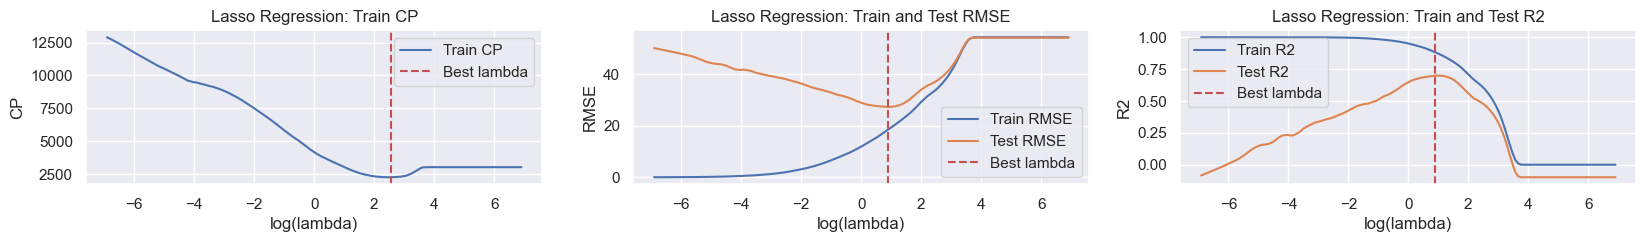

Best lambda for Lasso Regression: 2.412961183253607
Best R2 score for Lasso Regression: 0.6983054804040114
Best RMSE for Lasso Regression: 27.23244650344909
Best lambda for CP Lasso Regression: 12.805087496773325
RMSE for best lambda cp Lasso Regression: 37.60442323967858


In [284]:
# Iterate through each KFold
for i,(train_index, test_index) in enumerate(kf.split(X)):    
    
    # Split train-test
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # MISSING VALUE HANDLING WITHIN THE LOOP 
    X_train = handle_categorical_values(X_train)
    X_train = impute_missing_values(X_train)  # Imputation on training data

    # MISSING VALUE HANDLING WITHIN THE LOOP (for test set)
    X_test = handle_categorical_values(X_test)
    X_test = impute_missing_values(X_test)
    
    
    # align train and test data
    X_train, X_test = X_train.align(X_test, join = 'inner', axis=1)

    X_train = X_train.to_numpy()
    X_test = X_test.to_numpy()

    # Standardize the data x_train
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # OLS Regression

    # Fit the model
    model_ols = Ridge(alpha=0)
    model_ols.fit(X_train, y_train)

    #Calculate the MSE for OLS
    y_pred = model_ols.predict(X_test)
    mse_OLS = mean_squared_error(y_test, y_pred)
    
    # Lasso Regression

    for lambda_index, lambda_ in enumerate(lambdas_lasso):
        model_lasso = Lasso(alpha=lambda_)
        model_lasso.fit(X_train, y_train)
        
        # Predictions
        y_train_pred = model_lasso.predict(X_train)
        y_test_pred = model_lasso.predict(X_test)
        
        # Compute metrics
        train_r2[lambda_index, i] = r2_score(y_train, y_train_pred)
        test_r2[lambda_index, i] = r2_score(y_test, y_test_pred)
        train_rmse[lambda_index, i] = np.sqrt(mean_squared_error(y_train, y_train_pred))
        test_rmse[lambda_index, i] = np.sqrt(mean_squared_error(y_test, y_test_pred))

        # calculation of cp-statistics
        cp[lambda_index, i] = (mean_squared_error(y_test, y_test_pred) + 2 * np.sum(np.square(model_lasso.coef_)))

# Compute mean cp across folds for each lambda
mean_train_cp = np.mean(cp, axis=1)

# Compute mean metrics across folds for each lambda
mean_train_r2 = np.mean(train_r2, axis=1)
mean_test_r2 = np.mean(test_r2, axis=1)
mean_train_rmse = np.mean(train_rmse, axis=1)
mean_test_rmse = np.mean(test_rmse, axis=1)

# Optionally, find the lambda with the best average test metric (e.g., RMSE)
best_lambda_index = np.argmin(mean_test_rmse)
best_lambda_lasso = lambdas_lasso[best_lambda_index]

# find the lmabda with the best average test metric (e.g., cp)
best_lambda_index1 = np.argmin(mean_train_cp)
best_lambda_lasso1 = lambdas_lasso[best_lambda_index1]


# # plot the results

fig, ax = plt.subplots(1, 3, figsize=(20, 2))

# plot mean_train_cp
ax[0].plot(np.log(lambdas_lasso), mean_train_cp, label='Train CP')
ax[0].axvline(np.log(best_lambda_lasso1), color='r', linestyle='--', label='Best lambda')
ax[0].set_xlabel('log(lambda)')
ax[0].set_ylabel('CP')
ax[0].set_title('Lasso Regression: Train CP')
ax[0].legend()
# plot rmse
ax[1].plot(np.log(lambdas_lasso), mean_train_rmse, label='Train RMSE')
ax[1].plot(np.log(lambdas_lasso), mean_test_rmse, label='Test RMSE')
ax[1].axvline(np.log(best_lambda_lasso), color='r', linestyle='--', label='Best lambda')
ax[1].set_xlabel('log(lambda)')
ax[1].set_ylabel('RMSE')
ax[1].set_title('Lasso Regression: Train and Test RMSE')
ax[1].legend()
#plot r2
ax[2].plot(np.log(lambdas_lasso), mean_train_r2, label='Train R2')
ax[2].plot(np.log(lambdas_lasso), mean_test_r2, label='Test R2')
ax[2].axvline(np.log(best_lambda_lasso), color='r', linestyle='--', label='Best lambda')
ax[2].set_xlabel('log(lambda)')
ax[2].set_ylabel('R2')
ax[2].set_title('Lasso Regression: Train and Test R2')
ax[2].legend()
plt.show()


print('Best lambda for Lasso Regression:', best_lambda_lasso)
print('Best R2 score for Lasso Regression:', mean_test_r2[best_lambda_index])
print('Best RMSE for Lasso Regression:', mean_test_rmse[best_lambda_index])
print('Best lambda for CP Lasso Regression:', best_lambda_lasso1)
print('RMSE for best lambda cp Lasso Regression:', mean_test_rmse[best_lambda_index1])




c:\Users\mario\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:250: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
c:\Users\mario\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:250: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
c:\Users\mario\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:248: LinAlgWarning: Ill-conditioned matrix (rcond=5.56429e-18): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
c:\Users\mario\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:250: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
c:\Users\mario\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:248: LinAlgWarning: Ill-conditioned matrix (rcond=4.78522e-18): result may not be accurate.
  dual_coef = linalg.solve(K, y, ass

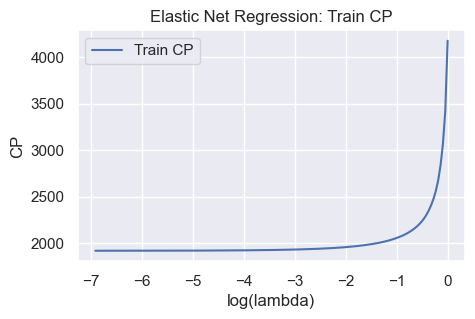

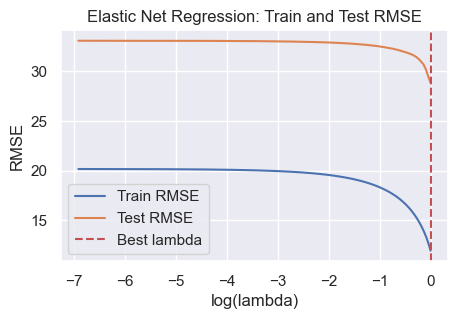

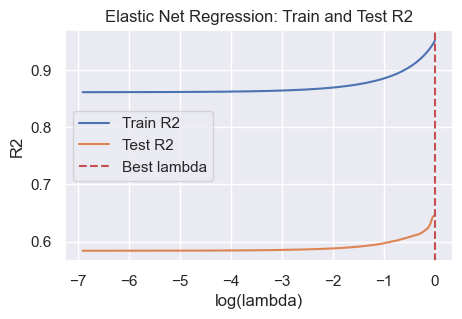

Best l1_ratio for Elastic Net Regression: 1.0
Best R2 score for Elastic Net Regression: 0.6468281278289117
Best RMSE for Elastic Net Regression: 28.840031789992462


In [285]:
# Iterate through each KFold
for i,(train_index, test_index) in enumerate(kf.split(X)):    
    
    # Split train-test
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # MISSING VALUE HANDLING WITHIN THE LOOP 
    X_train = handle_categorical_values(X_train)
    X_train = impute_missing_values(X_train)  # Imputation on training data

    # MISSING VALUE HANDLING WITHIN THE LOOP (for test set)
    X_test = handle_categorical_values(X_test)
    X_test = impute_missing_values(X_test)
    
    
    # align train and test data
    X_train, X_test = X_train.align(X_test, join = 'inner', axis=1)

    X_train = X_train.to_numpy()
    X_test = X_test.to_numpy()

    # Standardize the data x_train
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # OLS Regression

    # Fit the model
    model_ols = Ridge(alpha=0)
    model_ols.fit(X_train, y_train)

    #Calculate the MSE for OLS
    y_pred = model_ols.predict(X_test)
    mse_OLS = mean_squared_error(y_test, y_pred)
    
    # elastic Regression
    for lambda_index, lambda_ in enumerate(lambdas_elastic):
        model_elastic = ElasticNet(alpha=1, l1_ratio= lambda_)
        model_elastic.fit(X_train, y_train)
        
        # Predictions
        y_train_pred = model_elastic.predict(X_train)
        y_test_pred = model_elastic.predict(X_test)
        
        # Compute metrics
        train_r2[lambda_index, i] = r2_score(y_train, y_train_pred)
        test_r2[lambda_index, i] = r2_score(y_test, y_test_pred)
        train_rmse[lambda_index, i] = np.sqrt(mean_squared_error(y_train, y_train_pred))
        test_rmse[lambda_index, i] = np.sqrt(mean_squared_error(y_test, y_test_pred))

        # calculation of cp-statistics
        cp[lambda_index, i] = (mean_squared_error(y_test, y_test_pred) + 2 * np.sum(np.square(model_elastic.coef_)))

# Compute mean cp across folds for each lambda
mean_train_cp = np.mean(cp, axis=1)

# Compute mean metrics across folds for each lambda
mean_train_r2 = np.mean(train_r2, axis=1)
mean_test_r2 = np.mean(test_r2, axis=1)
mean_train_rmse = np.mean(train_rmse, axis=1)
mean_test_rmse = np.mean(test_rmse, axis=1)

# Optionally, find the lambda with the best average test metric (e.g., RMSE)
best_lambda_index = np.argmin(mean_test_rmse)
best_lambda_elastic = lambdas_elastic[best_lambda_index]

# plot mean_train_cp
plt.figure(figsize=(5, 3))
plt.plot(np.log(lambdas_elastic), mean_train_cp, label='Train CP')
plt.xlabel('log(lambda)')
plt.ylabel('CP')
plt.title('Elastic Net Regression: Train CP')
plt.legend()
plt.show()

# plot the results
plt.figure(figsize=(5, 3))
plt.plot(np.log(lambdas_elastic), mean_train_rmse, label='Train RMSE')
plt.plot(np.log(lambdas_elastic), mean_test_rmse, label='Test RMSE')
plt.axvline(np.log(best_lambda_elastic), color='r', linestyle='--', label='Best lambda')
plt.xlabel('log(lambda)')
plt.ylabel('RMSE')
plt.title('Elastic Net Regression: Train and Test RMSE')
plt.legend()
plt.show()

# r2 score plot
plt.figure(figsize=(5, 3))
plt.plot(np.log(lambdas_elastic), mean_train_r2, label='Train R2')
plt.plot(np.log(lambdas_elastic), mean_test_r2, label='Test R2')
plt.axvline(np.log(best_lambda_elastic), color='r', linestyle='--', label='Best lambda')
plt.xlabel('log(lambda)')
plt.ylabel('R2')
plt.title('Elastic Net Regression: Train and Test R2')
plt.legend()
plt.show()

print('Best l1_ratio for Elastic Net Regression:', best_lambda_elastic)
print('Best R2 score for Elastic Net Regression:', mean_test_r2[best_lambda_index])
print('Best RMSE for Elastic Net Regression:', mean_test_rmse[best_lambda_index])

c:\Users\mario\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:250: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
c:\Users\mario\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.965e+01, tolerance: 2.291e+01
  model = cd_fast.enet_coordinate_descent(
c:\Users\mario\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.460e+01, tolerance: 2.291e+01
  model = cd_fast.enet_coordinate_descent(
c:\Users\mario\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarni

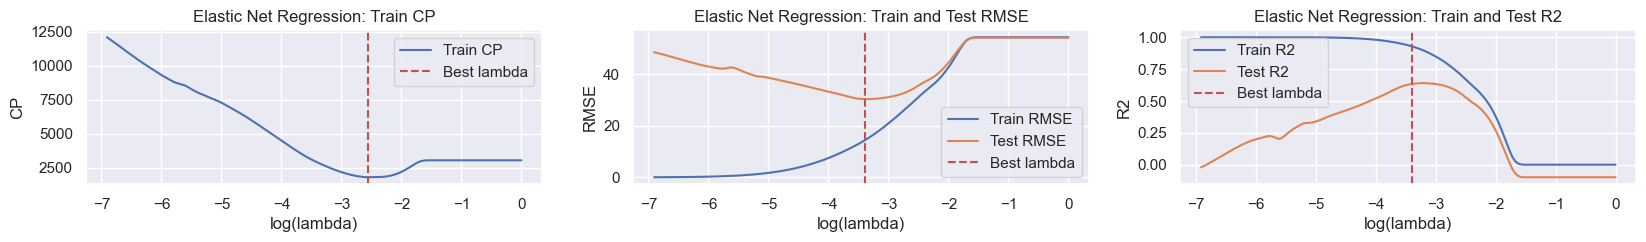

Best lambda for Elastic Net Regression: 0.03390012833314499
Best R2 score for Elastic Net Regression: 0.6336013265209435
Best RMSE for Elastic Net Regression: 30.273739323242705
Best lambda for CP Elastic Net Regression: 0.078093960720845


In [286]:
# metrics
train_r2 = np.zeros((n, k))
test_r2 = np.zeros((n, k))
train_rmse = np.zeros((n, k))
test_rmse = np.zeros((n, k))
mean_r2 = np.zeros((n, k))
mean_rmse = np.zeros((n, k))
cp = np.zeros((n, k))

# Iterate through each KFold
for i,(train_index, test_index) in enumerate(kf.split(X)):    
    
    # Split train-test
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # MISSING VALUE HANDLING WITHIN THE LOOP 
    X_train = handle_categorical_values(X_train)
    X_train = impute_missing_values(X_train)  # Imputation on training data

    # MISSING VALUE HANDLING WITHIN THE LOOP (for test set)
    X_test = handle_categorical_values(X_test)
    X_test = impute_missing_values(X_test)
    
    
    # align train and test data
    X_train, X_test = X_train.align(X_test, join = 'inner', axis=1)

    X_train = X_train.to_numpy()
    X_test = X_test.to_numpy()

    # Standardize the data x_train
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # OLS Regression

    # Fit the model
    model_ols = Ridge(alpha=0)
    model_ols.fit(X_train, y_train)

    #Calculate the MSE for OLS
    y_pred = model_ols.predict(X_test)
    mse_OLS = mean_squared_error(y_test, y_pred)
    
    # elastic Regression
    for lambda_index, lambda_ in enumerate(lambdas1_elastic):
        model_elastic = ElasticNet(alpha=lambda_, l1_ratio= 0.9)
        model_elastic.fit(X_train, y_train)
        
        # Predictions
        y_train_pred = model_elastic.predict(X_train)
        y_test_pred = model_elastic.predict(X_test)
        
        # Compute metrics
        train_r2[lambda_index, i] = r2_score(y_train, y_train_pred)
        test_r2[lambda_index, i] = r2_score(y_test, y_test_pred)
        train_rmse[lambda_index, i] = np.sqrt(mean_squared_error(y_train, y_train_pred))
        test_rmse[lambda_index, i] = np.sqrt(mean_squared_error(y_test, y_test_pred))

        # calculation of cp-statistics
        cp[lambda_index, i] = (mean_squared_error(y_test, y_test_pred) + 2 * np.sum(np.square(model_elastic.coef_)))

# Compute mean cp across folds for each lambda
mean_train_cp = np.mean(cp, axis=1)

# Compute mean metrics across folds for each lambda
mean_train_r2 = np.mean(train_r2, axis=1)
mean_test_r2 = np.mean(test_r2, axis=1)
mean_train_rmse = np.mean(train_rmse, axis=1)
mean_test_rmse = np.mean(test_rmse, axis=1)

# Optionally, find the lambda with the best average test metric (e.g., RMSE)
best_lambda_index = np.argmin(mean_test_rmse)
best_lambda_elastic = lambdas_elastic[best_lambda_index]

# Optionally, find the lambda with the best average test metric (e.g., cp)
best_lambda_index1 = np.argmin(mean_train_cp)
best_lambda_elastic1 = lambdas_elastic[best_lambda_index1]





# plot results
fig, ax = plt.subplots(1, 3, figsize=(20, 2))

# plot cp
ax[0].plot(np.log(lambdas_elastic), mean_train_cp, label='Train CP')
ax[0].axvline(np.log(best_lambda_elastic1), color='r', linestyle='--', label='Best lambda')
ax[0].set_xlabel('log(lambda)')
ax[0].set_ylabel('CP')
ax[0].set_title('Elastic Net Regression: Train CP')
ax[0].legend()

# plot rmse
ax[1].plot(np.log(lambdas_elastic), mean_train_rmse, label='Train RMSE')
ax[1].plot(np.log(lambdas_elastic), mean_test_rmse, label='Test RMSE')
ax[1].axvline(np.log(best_lambda_elastic), color='r', linestyle='--', label='Best lambda')
ax[1].set_xlabel('log(lambda)')
ax[1].set_ylabel('RMSE')
ax[1].set_title('Elastic Net Regression: Train and Test RMSE')
ax[1].legend()

# plot r2
ax[2].plot(np.log(lambdas_elastic), mean_train_r2, label='Train R2')
ax[2].plot(np.log(lambdas_elastic), mean_test_r2, label='Test R2')
ax[2].axvline(np.log(best_lambda_elastic), color='r', linestyle='--', label='Best lambda')
ax[2].set_xlabel('log(lambda)')
ax[2].set_ylabel('R2')
ax[2].set_title('Elastic Net Regression: Train and Test R2')
ax[2].legend()
plt.show()

print('Best lambda for Elastic Net Regression:', best_lambda_elastic)
print('Best R2 score for Elastic Net Regression:', mean_test_r2[best_lambda_index])
print('Best RMSE for Elastic Net Regression:', mean_test_rmse[best_lambda_index])
print('Best lambda for CP Elastic Net Regression:', best_lambda_elastic1)

c:\Users\mario\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:250: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
c:\Users\mario\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:250: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
c:\Users\mario\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:248: LinAlgWarning: Ill-conditioned matrix (rcond=5.56429e-18): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
c:\Users\mario\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:250: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
c:\Users\mario\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:248: LinAlgWarning: Ill-conditioned matrix (rcond=4.78522e-18): result may not be accurate.
  dual_coef = linalg.solve(K, y, ass

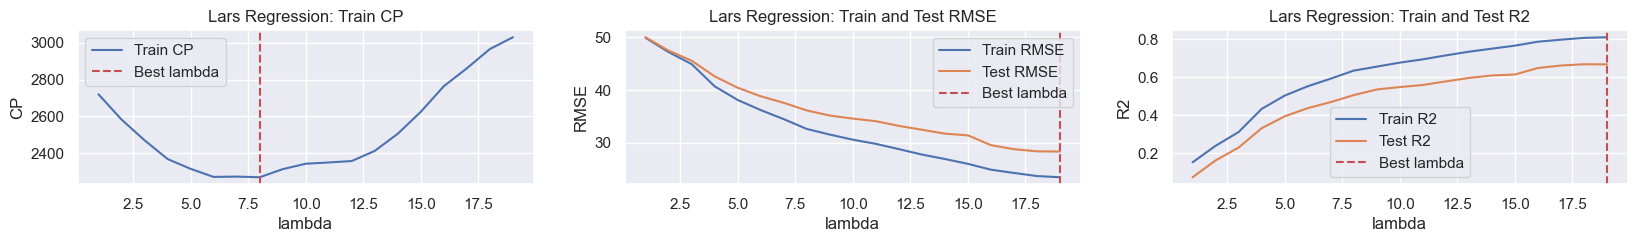

Best lambda for Lars Regression: 19
Best R2 score for Lars Regression: 0.6678113177958783
Best RMSE for Lars Regression: 28.34607741591151
Best lambda for CP Lars Regression: 8


In [287]:
train_r2 = np.zeros((stop-1, k))
test_r2 = np.zeros((stop-1, k))
train_rmse = np.zeros((stop-1, k))
test_rmse = np.zeros((stop-1, k))
mean_r2 = np.zeros((stop-1, k))
mean_rmse = np.zeros((stop-1, k))
cp = np.zeros((stop-1, k))




# Iterate through each KFold
for i,(train_index, test_index) in enumerate(kf.split(X)):    
    
    # Split train-test


    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # MISSING VALUE HANDLING WITHIN THE LOOP 
    X_train = handle_categorical_values(X_train)
    X_train = impute_missing_values(X_train)  # Imputation on training data

    # MISSING VALUE HANDLING WITHIN THE LOOP (for test set)
    X_test = handle_categorical_values(X_test)
    X_test = impute_missing_values(X_test)
    
    
    # align train and test data
    X_train, X_test = X_train.align(X_test, join = 'inner', axis=1)

    X_train = X_train.to_numpy()
    X_test = X_test.to_numpy()

    # Standardize the data x_train
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # OLS Regression

    # Fit the model
    model_ols = Ridge(alpha=0)
    model_ols.fit(X_train, y_train)

    #Calculate the MSE for OLS
    y_pred = model_ols.predict(X_test)
    mse_OLS = mean_squared_error(y_test, y_pred)

    # lars Regression

    for lambda_index, lambda_ in enumerate(lambdas_lars):
        model_lars = Lars(n_nonzero_coefs=int(lambda_))
        model_lars.fit(X_train, y_train)
        
        # Predictions
        y_train_pred = model_lars.predict(X_train)
        y_test_pred = model_lars.predict(X_test)
        
        # Compute metrics
        train_r2[lambda_index, i] = r2_score(y_train, y_train_pred)
        test_r2[lambda_index, i] = r2_score(y_test, y_test_pred)
        train_rmse[lambda_index, i] = np.sqrt(mean_squared_error(y_train, y_train_pred))
        test_rmse[lambda_index, i] = np.sqrt(mean_squared_error(y_test, y_test_pred))

        # calculation of cp-statistics
        cp[lambda_index, i] =  (mean_squared_error(y_test, y_test_pred) + 2 * np.sum(np.square(model_lars.coef_)))

# Compute mean cp across folds for each lambda
mean_train_cp = np.mean(cp, axis=1)

# Compute mean metrics across folds for each lambda
mean_train_r2 = np.mean(train_r2, axis=1)
mean_test_r2 = np.mean(test_r2, axis=1)
mean_train_rmse = np.mean(train_rmse, axis=1)
mean_test_rmse = np.mean(test_rmse, axis=1)

# Optionally, find the lambda with the best average test metric (e.g., RMSE)
best_lambda_index = np.argmin(mean_test_rmse)
best_lambda_lars = lambdas_lars[best_lambda_index]

# Optionally, find the lambda with the best average test metric (e.g., cp)
best_lambda_index1 = np.argmin(mean_train_cp)
best_lambda_lars1 = lambdas_lars[best_lambda_index1]

# plot results
fig, ax = plt.subplots(1, 3, figsize=(20, 2))

# plot cp
ax[0].plot(lambdas_lars, mean_train_cp, label='Train CP')
ax[0].set_xlabel('lambda')
ax[0].set_ylabel('CP')
ax[0].set_title('Lars Regression: Train CP')
ax[0].axvline(best_lambda_lars1, color='r', linestyle='--', label='Best lambda')
ax[0].legend()

# plot rmse
ax[1].plot(lambdas_lars, mean_train_rmse, label='Train RMSE')
ax[1].plot(lambdas_lars, mean_test_rmse, label='Test RMSE')
ax[1].set_xlabel('lambda')
ax[1].set_ylabel('RMSE')
ax[1].set_title('Lars Regression: Train and Test RMSE')
ax[1].axvline(best_lambda_lars, color='r', linestyle='--', label='Best lambda')
ax[1].legend()

# plot r2
ax[2].plot(lambdas_lars, mean_train_r2, label='Train R2')
ax[2].plot(lambdas_lars, mean_test_r2, label='Test R2')
ax[2].set_xlabel('lambda')
ax[2].set_ylabel('R2')
ax[2].set_title('Lars Regression: Train and Test R2')
ax[2].axvline(best_lambda_lars, color='r', linestyle='--', label='Best lambda')
ax[2].legend()
plt.show()

print('Best lambda for Lars Regression:', best_lambda_lars)
print('Best R2 score for Lars Regression:', mean_test_r2[best_lambda_index])
print('Best RMSE for Lars Regression:', mean_test_rmse[best_lambda_index])
print('Best lambda for CP Lars Regression:', best_lambda_lars1)

In [297]:
case1DataPath = 'case1Data.txt'

# Reading the dataset
df = pd.read_csv(case1DataPath, delimiter=',')

In [298]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]


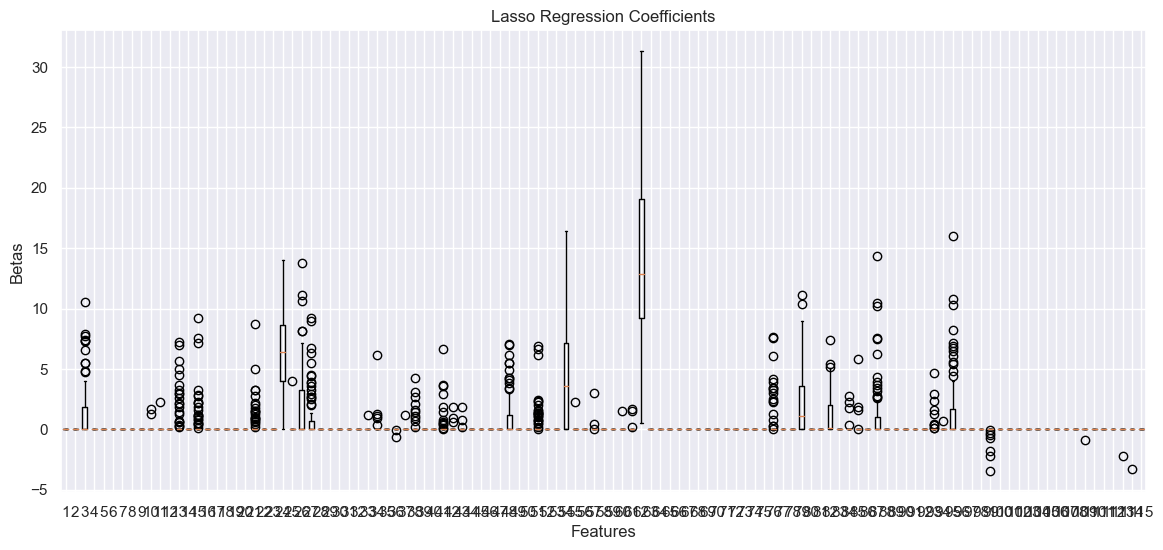

In [ ]:
betas2 = bootstrap_lasso(X, y, 100, best_lambda_lasso1)

plt.figure(figsize=(14, 6))
plt.boxplot(betas2.T)
plt.xlabel("Features")
plt.ylabel("Betas")
plt.title("Lasso Regression Coefficients")
plt.show()

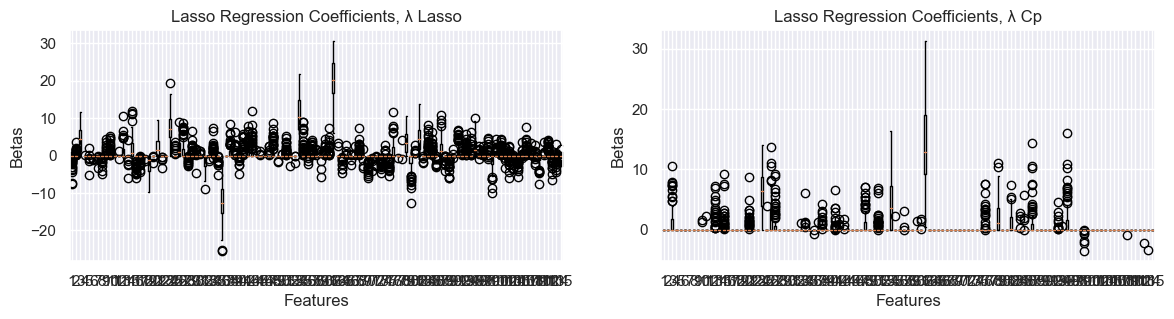

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14, 3))
ax[0].boxplot(betas1.T)
ax[0].set_xlabel("Features")
ax[0].set_ylabel("Betas")
ax[0].set_title("Lasso Regression Coefficients, λ Lasso")
ax[1].boxplot(betas2.T)
ax[1].set_xlabel("Features")
ax[1].set_ylabel("Betas")
ax[1].set_title("Lasso Regression Coefficients, λ Cp")
plt.show()
